1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2. Import Dataset

In [5]:
salary = pd.read_csv('Employee_Salary.csv')
salary.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [6]:
salary.tail(10)

,Years of Experience,Salary
1990,18.583977,374277.2253
1991,18.806528,390051.2268
1992,18.817387,392165.2403
1993,19.063416,413149.8396
1994,19.164009,420555.4056
1995,19.178575,421534.6910
1996,19.254499,430478.0265
1997,19.353369,438090.8454
1998,19.842520,482242.1608
1999,20.000000,500000.0000


In [7]:
salary.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


In [8]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


3. Visualize Dataset

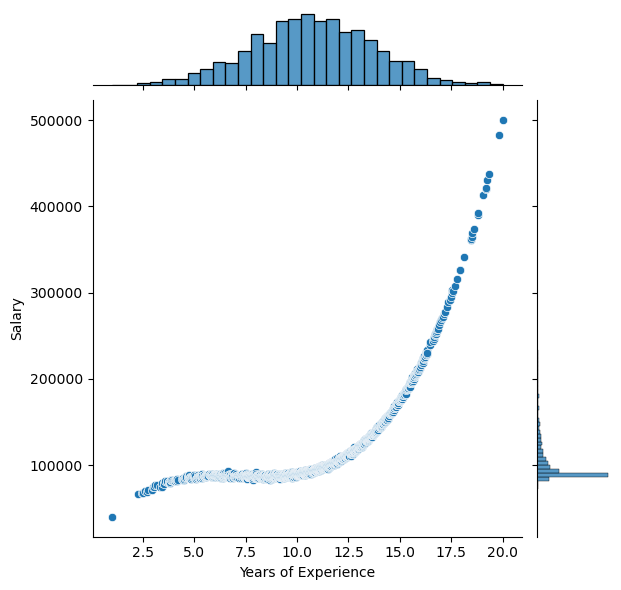

In [9]:
sns.jointplot(x = 'Years of Experience', y = 'Salary', data = salary)

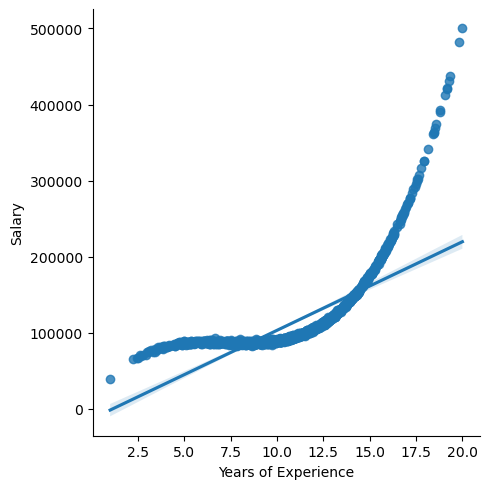

In [10]:
sns.lmplot(x = 'Years of Experience', y = 'Salary', data = salary)

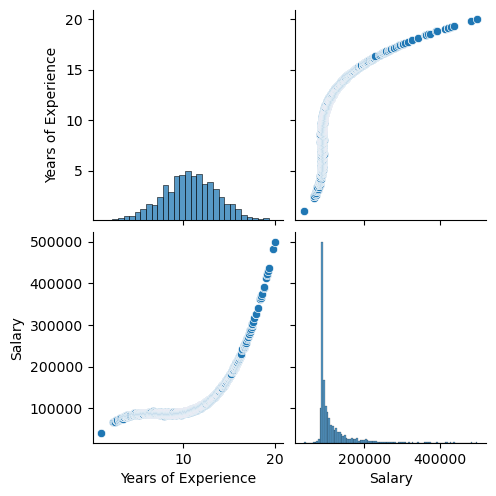

In [11]:
sns.pairplot(salary)

4. Create Training Dataset

In [12]:
x = salary[['Years of Experience']]
x

,Years of Experience
0,1.000000
1,2.257942
2,2.450875
3,2.498713
4,2.613729
...,...
1995,19.178575
1996,19.254499
1997,19.353369
1998,19.842520


In [13]:
x.shape

(2000, 1)

In [14]:
y = salary[['Salary']]
y

,Salary
0,40000.00000
1,65979.42119
2,67253.57549
3,67342.43510
4,70532.20448
...,...
1995,421534.69100
1996,430478.02650
1997,438090.84540
1998,482242.16080


In [15]:
x_train = x
y_train = y

5. Model Training

In [ ]:
x_train.shape 

(2000, 1)

In [19]:
from sklearn.linear_model import LinearRegression

In [21]:
regressor = LinearRegression(fit_intercept = True)

In [22]:
regressor.fit(x_train, y_train)

LinearRegression()

In [25]:
print('Linear Model Coeff (m): ', regressor.coef_)
print('Linear Model Coeff (b): ', regressor.intercept_)

Linear Model Coeff (m):  [[11640.22916165]]
Linear Model Coeff (b):  [-13063.09931519]


In [ ]:
#Fit intercept = True
#Linear Model Coeff (m): [[11640.22916165]]
#Linear Model Coeff (b): [-13063.09931519]

#Fit intercept = False
#Linear Model Coeff (m): [[10511.28514602]]
#Linear Model Coeff (b): 0.0

6. Visualize the results

Text(0.5, 1.0, 'Salary vs. Years of Experience (Linear Assumption)')

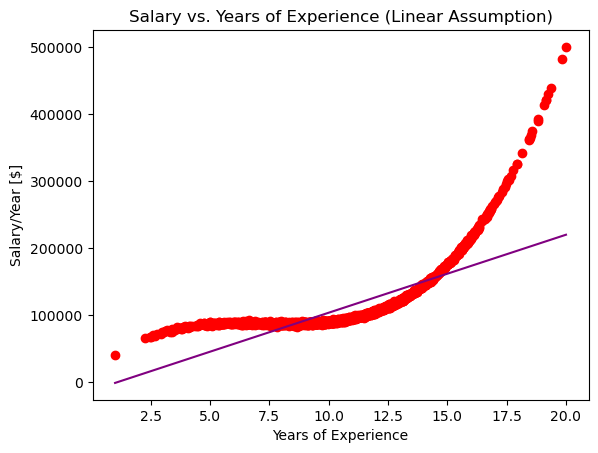

In [30]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'purple')
plt.xlabel('Years of Experience')
plt.ylabel('Salary/Year [$]')
plt.title('Salary vs. Years of Experience (Linear Assumption)')

Solution 2: Polynomial Assumption

5. Model Training

Solution 1: Linear Assumption

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
poly_regressor = PolynomialFeatures(degree = 2)

In [33]:
x_columns = poly_regressor.fit_transform(x_train)

In [34]:
x_columns

array([[  1.        ,   1.        ,   1.        ],
       [  1.        ,   2.25794198,   5.09830199],
       [  1.        ,   2.45087546,   6.00679053],
       ...,
       [  1.        ,  19.35336879, 374.55288352],
       [  1.        ,  19.84251968, 393.72558725],
       [  1.        ,  20.        , 400.        ]])

In [36]:
regressor = LinearRegression()
regressor.fit(x_columns, y_train)

LinearRegression()

In [37]:
print('Model Coeff:', regressor.coef_)

Model Coeff: [[     0.         -33106.32895617   2095.78613853]]


6. Visualize The Results

In [39]:
y_predict = regressor.predict(poly_regressor.fit_transform(x_train))

Text(0.5, 1.0, 'Salary vs. Years of Experience (Poly Assumption, Order = 2)')

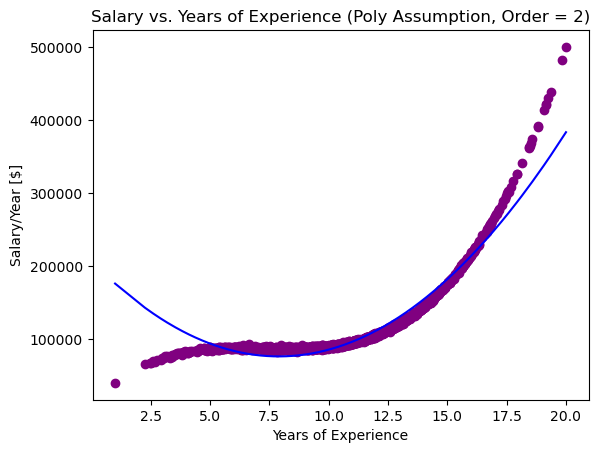

In [43]:
plt.scatter(x_train, y_train, color = 'purple')
plt.plot(x_train, y_predict, color = 'blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary/Year [$]')
plt.title('Salary vs. Years of Experience (Poly Assumption, Order = 2)')